<a href='click'><img src='https://analyticsindiamag.com/wp-content/uploads/2020/06/american_sign_language-768x429.png'/></a>

<center><em><br><b>Hands-On Guide To Sign Language Classification Using CNN</b>    <br>by Soumen Das</em></center>

<b>Sign Language MNIST</b>
Drop-In Replacement for MNIST for Hand Gesture Recognition Tasks

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture <a href="https://github.com/mon95/Sign-Language-and-Static-gesture-recognition-using-sklearn">image data</a>      represented multiple users repeating the gesture against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest.


<a href="https://www.kaggle.com/datamunge/sign-language-mnist">DATASET</a>,To stimulate the community to develop more drop-in replacements the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

**MOUNT THE DATA SET**
the data ,I have downloaded and upload to my drive

In [1]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [2]:
"""!unzip "/content/drive/MyDrive/archive (1).zip" -d "/content/" """

'!unzip "/content/drive/MyDrive/archive (1).zip" -d "/content/" '

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,  BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image  #image module helps to load image

from keras.models import load_model
from keras.models import model_from_json

In [4]:
train_data=pd.read_csv('sign_mnist_train.csv')

In [5]:
train_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [6]:
train_data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [7]:
train_x=train_data.drop(columns="label")
#train_x

In [8]:
train_y=train_data["label"]
#train_y

In [9]:
def csv_to_image_shape(train_x):
  train_X=[]
  for i in range(train_x.shape[0]):
   temp=train_x.loc[i].values
   data=temp.reshape(28,28)
   train_X.append(data)
  train_X=np.asanyarray(train_X)
  return train_X

In [10]:
train_X=csv_to_image_shape(train_x)
train_X

array([[[107, 118, 127, ..., 170, 170, 169],
        [111, 121, 129, ..., 171, 171, 170],
        [113, 123, 131, ..., 171, 171, 171],
        ...,
        [142, 150, 159, ..., 202, 201, 200],
        [142, 151, 160, ..., 204, 203, 202],
        [142, 151, 160, ..., 204, 203, 202]],

       [[155, 157, 156, ..., 138,  92, 108],
        [158, 159, 159, ..., 142, 116, 143],
        [161, 161, 161, ..., 147, 125, 140],
        ...,
        [162, 159, 145, ...,  91, 101,  94],
        [153, 139, 115, ...,  97,  95, 120],
        [135, 116,  95, ..., 103, 135, 149]],

       [[187, 188, 188, ...,  66,  77,  83],
        [188, 189, 189, ...,  73,  73,  71],
        [190, 190, 190, ...,  74,  68,  61],
        ...,
        [212, 198, 175, ..., 195, 193, 192],
        [202, 179, 152, ..., 195, 194, 193],
        [198, 166, 132, ..., 195, 194, 195]],

       ...,

       [[174, 174, 174, ..., 160, 158, 156],
        [178, 178, 177, ..., 162, 160, 158],
        [181, 180, 180, ..., 164, 162, 161

In [11]:
train_X.shape

(27455, 28, 28)

In [12]:
train_X[1].shape

(28, 28)

In [13]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [14]:
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl

def imshow(image):
    plt.imshow(image)
    plt.title(image.shape)
    plt.show()

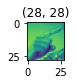

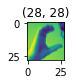

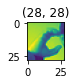

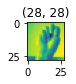

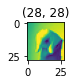

In [15]:
for i in range(1,6):
    plt.subplot(5,1,i)
    imshow(train_X[i])

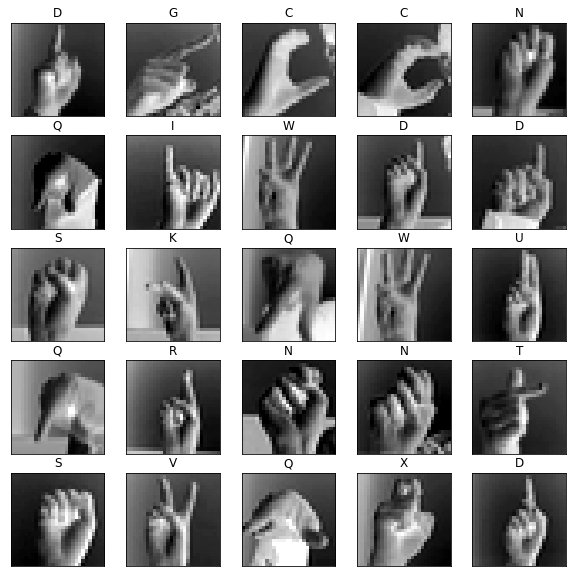

In [16]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    label_index = int(train_y[i])
    plt.title(class_names[label_index])
plt.show()

In [17]:
test_data=pd.read_csv('sign_mnist_test.csv')
test_data.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [18]:
test_x=test_data.drop(columns="label")
#test_x

In [19]:
test_y=test_data["label"]
#train_y

In [20]:
test_X=csv_to_image_shape(test_x)
test_X

array([[[149, 149, 150, ..., 150, 150, 149],
        [150, 150, 150, ..., 151, 150, 151],
        [150, 151, 151, ..., 151, 151, 152],
        ...,
        [ 69,  69,  77, ..., 116, 113, 118],
        [ 74,  75,  76, ..., 110, 116, 113],
        [ 75,  74,  74, ..., 112, 120, 107]],

       [[126, 128, 131, ..., 133, 134, 132],
        [129, 132, 134, ..., 136, 136, 134],
        [133, 135, 138, ..., 140, 139, 138],
        ...,
        [173, 174, 177, ..., 184, 182, 181],
        [172, 174, 177, ..., 184, 182, 181],
        [172, 174, 177, ..., 184, 182, 180]],

       [[ 85,  88,  92, ..., 182, 181, 178],
        [ 86,  88,  93, ..., 183, 181, 179],
        [ 86,  89,  93, ..., 185, 183, 181],
        ...,
        [ 91,  94,  97, ..., 224, 222, 221],
        [ 90,  92,  96, ..., 225, 224, 222],
        [ 89,  91,  94, ..., 225, 224, 222]],

       ...,

       [[190, 191, 190, ..., 185, 184, 183],
        [193, 193, 193, ..., 186, 185, 184],
        [195, 194, 195, ..., 187, 186, 187

In [21]:
test_X.shape

(7172, 28, 28)

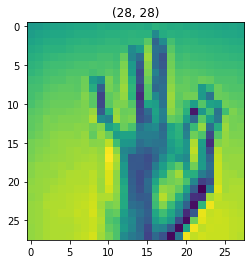

In [22]:
imshow(test_X[1])

In [23]:
training_data = np.expand_dims(train_X, axis=3)
testing_data = np.expand_dims(test_X, axis=3)

print(training_data.shape)
print(testing_data.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [24]:
training_data[1].shape

(28, 28, 1)

In [25]:
testing_data[1].shape

(28, 28, 1)

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale=1 / 255)

In [27]:
train_generator = train_datagen.flow(
    training_data,
    train_y,
    batch_size = 512
)

In [28]:
validation_generator = validation_datagen.flow(
    x=testing_data,
    y=test_y,
    batch_size = 512
)

In [87]:
# Dimension of our images.
img_width, img_height = 28, 28

#Setting up the batchsizes.
nb_train_samples = 27455
nb_validation_samples = 7172
epochs = 60
batch_size = 512

input_shape=(28,28,1)

In [88]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64, (3, 3), input_shape = input_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
#cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
#cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1000, activation = 'relu'))
#cnn_model.add(Dropout(0.5))
#cnn_model.add(Dense(units = 750, activation = 'relu'))
#cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units = 500, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units = 250, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [89]:
#to print a summary representation of your model
cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 9, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 4, 4, 128)       

In [90]:
cnn_model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
    

In [91]:
#train_generator
#validation_generator
"""model1 = cnn_model.fit(training_data,train_y,
                    validation_data = (testing_data,test_y),
                    steps_per_epoch = nb_train_samples//batch_size,
                    epochs = epochs,
                    validation_steps = nb_validation_samples//batch_size)"""

'model1 = cnn_model.fit(training_data,train_y,\n                    validation_data = (testing_data,test_y),\n                    steps_per_epoch = nb_train_samples//batch_size,\n                    epochs = epochs,\n                    validation_steps = nb_validation_samples//batch_size)'

In [92]:
#
#
model1 = cnn_model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = nb_train_samples//batch_size,
                    epochs = epochs,
                    validation_steps = nb_validation_samples//batch_size)

Epoch 1/60
53/53 [==============================] - 34s 640ms/step - loss: 3.1994 - accuracy: 0.0454 - val_loss: 3.2010 - val_accuracy: 0.0225
Epoch 2/60
53/53 [==============================] - 34s 646ms/step - loss: 3.1085 - accuracy: 0.0687 - val_loss: 2.9638 - val_accuracy: 0.0866
Epoch 3/60
53/53 [==============================] - 34s 644ms/step - loss: 2.9164 - accuracy: 0.1006 - val_loss: 2.8900 - val_accuracy: 0.1080
Epoch 4/60
53/53 [==============================] - 34s 640ms/step - loss: 2.6924 - accuracy: 0.1496 - val_loss: 2.5490 - val_accuracy: 0.1861
Epoch 5/60
53/53 [==============================] - 34s 644ms/step - loss: 2.4312 - accuracy: 0.2130 - val_loss: 1.9059 - val_accuracy: 0.3267
Epoch 6/60
53/53 [==============================] - 34s 642ms/step - loss: 2.1214 - accuracy: 0.2906 - val_loss: 1.5692 - val_accuracy: 0.3954
Epoch 7/60
53/53 [==============================] - 34s 650ms/step - loss: 1.8690 - accuracy: 0.3607 - val_loss: 1.3823 - val_accuracy: 0.4877

Epoch 58/60
53/53 [==============================] - 35s 653ms/step - loss: 0.1954 - accuracy: 0.9369 - val_loss: 0.0215 - val_accuracy: 0.9920
Epoch 59/60
53/53 [==============================] - 35s 659ms/step - loss: 0.1913 - accuracy: 0.9378 - val_loss: 0.0189 - val_accuracy: 0.9936
Epoch 60/60
53/53 [==============================] - 35s 666ms/step - loss: 0.1874 - accuracy: 0.9402 - val_loss: 0.0101 - val_accuracy: 0.9979


Text(0.5, 1.0, 'Accuracy evolution')

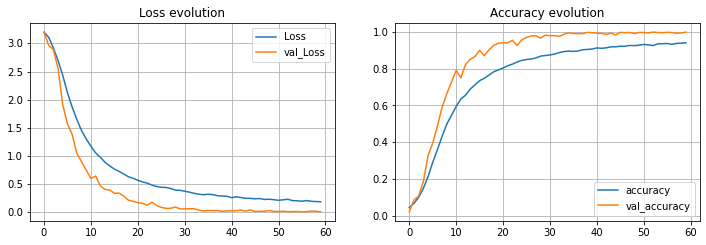

In [93]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model1.history['loss'], label='Loss')
plt.plot(model1.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(model1.history['accuracy'], label='accuracy')
plt.plot(model1.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [100]:
#to save the weights in the model as a HDF file

cnn_model.save_weights('sign_detc1.h5')

In [101]:
#to save the architecture of the model as a json file

with open('sign_detc1.json','w') as f:
    f.write(cnn_model.to_json())